In [24]:
import pandas as pd

data_path = r"C:\Users\Les\Downloads\coursework\data\processed\processed_data.csv"
data = pd.read_csv(data_path)

print("\nСтатистическая сводка:")
print(data.describe())

Q1 = data['NowCast Conc.'].quantile(0.25)
Q3 = data['NowCast Conc.'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nДиапазон для выбросов по IQR:")
print(f"Нижний порог: {lower_bound}, Верхний порог: {upper_bound}")

missing_data = data.isnull().sum()
print("\nПропущенные данные:")
print(missing_data)


Статистическая сводка:
               Year         Month           Day          Hour  NowCast Conc.  \
count  42855.000000  42855.000000  42855.000000  42855.000000   42855.000000   
mean    2021.116322      6.461136     15.663727     11.504562      31.834013   
std        1.470888      3.470889      8.796705      6.922190      51.725681   
min     2019.000000      1.000000      1.000000      0.000000       0.000000   
25%     2020.000000      3.000000      8.000000      6.000000       8.700000   
50%     2021.000000      6.000000     16.000000     12.000000      18.000000   
75%     2022.000000     10.000000     23.000000     18.000000      31.900000   
max     2024.000000     12.000000     31.000000     23.000000     769.100000   

                AQI     Raw Conc.  
count  42855.000000  42855.000000  
mean      76.035676     32.601598  
std       63.144669     57.582749  
min        0.000000      0.000000  
25%       36.000000      8.000000  
50%       63.000000     18.000000  
75%

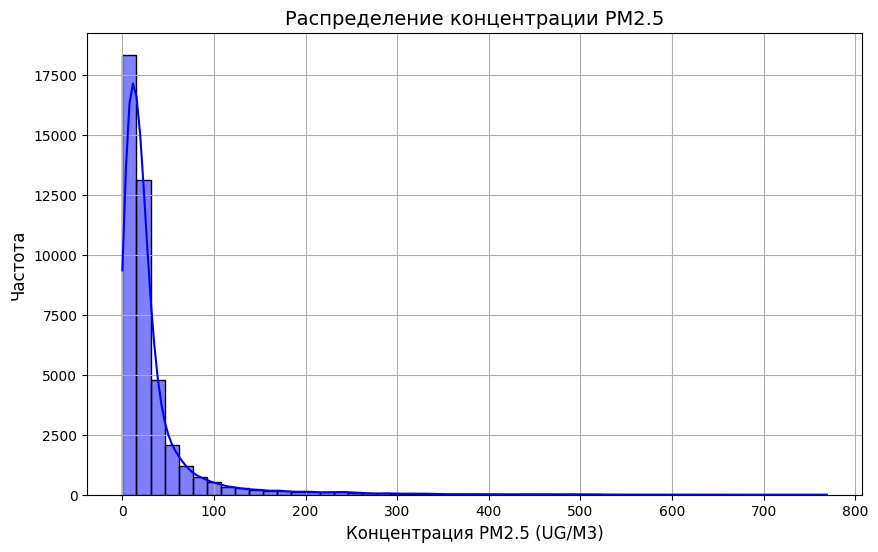

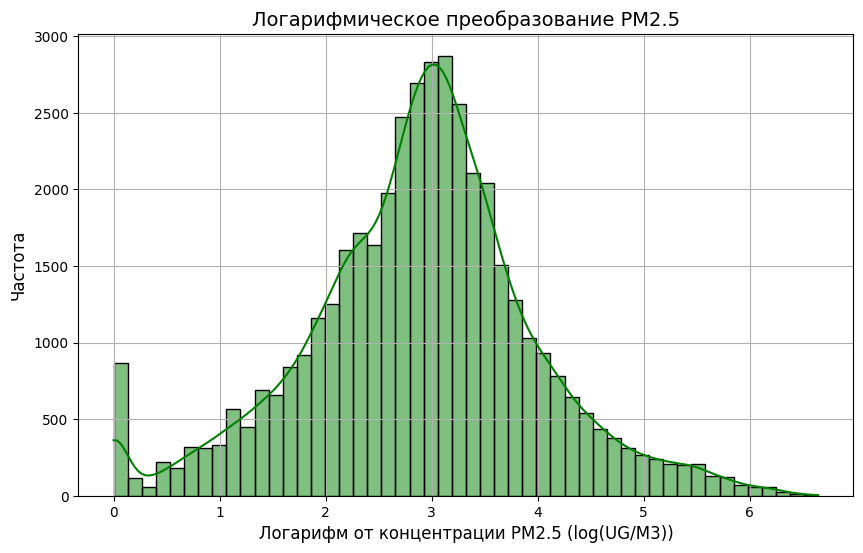

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(data['NowCast Conc.'], bins=50, kde=True, color='blue')
plt.title("Распределение концентрации PM2.5", fontsize=14)
plt.xlabel("Концентрация PM2.5 (UG/M3)", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.grid(True)
plt.show()

data['log_NowCast_Conc'] = np.log1p(data['NowCast Conc.'])
plt.figure(figsize=(10, 6))
sns.histplot(data['log_NowCast_Conc'], bins=50, kde=True, color='green')
plt.title("Логарифмическое преобразование PM2.5", fontsize=14)
plt.xlabel("Логарифм от концентрации PM2.5 (log(UG/M3))", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.grid(True)
plt.show()

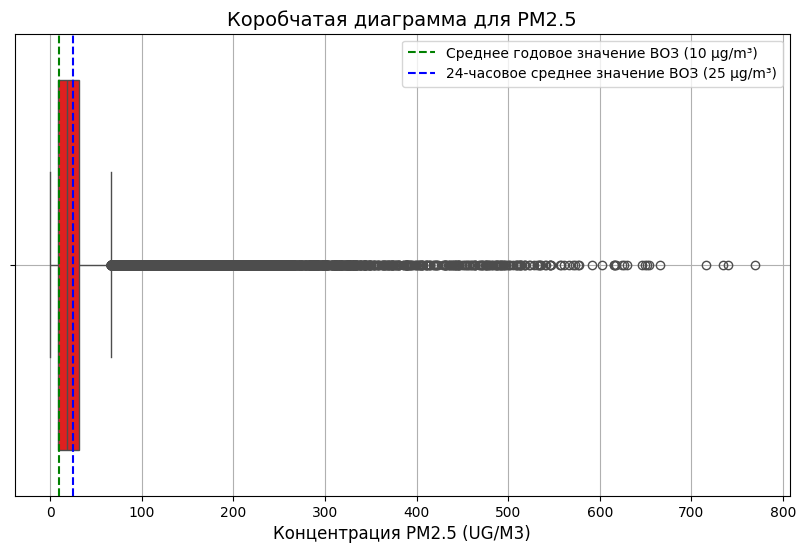

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['NowCast Conc.'], color='red')
plt.title("Коробчатая диаграмма для PM2.5", fontsize=14)
plt.xlabel("Концентрация PM2.5 (UG/M3)", fontsize=12)
plt.grid(True)

plt.axvline(10, color='green', linestyle='--', label='Среднее годовое значение ВОЗ (10 µg/m³)')
plt.axvline(25, color='blue', linestyle='--', label='24-часовое среднее значение ВОЗ (25 µg/m³)')
plt.legend()
plt.show()

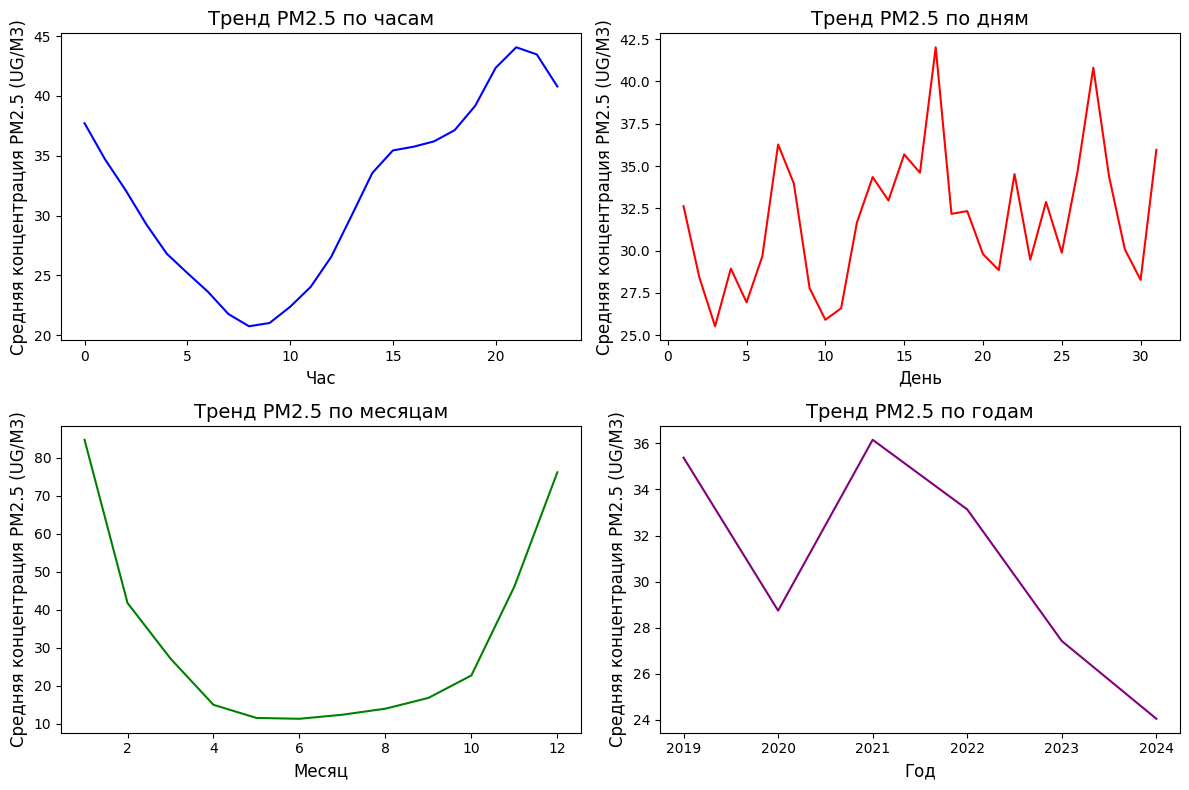

In [27]:
data['Date (LT)'] = pd.to_datetime(data['Date (LT)'])
data['Year'] = data['Date (LT)'].dt.year
data['Month'] = data['Date (LT)'].dt.month
data['Day'] = data['Date (LT)'].dt.day
data['Hour'] = data['Date (LT)'].dt.hour

hourly_trends = data.groupby('Hour')['NowCast Conc.'].mean()
daily_trends = data.groupby('Day')['NowCast Conc.'].mean()
monthly_trends = data.groupby('Month')['NowCast Conc.'].mean()
yearly_trends = data.groupby('Year')['NowCast Conc.'].mean()

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
hourly_trends.plot(kind='line', color='blue')
plt.title("Тренд PM2.5 по часам", fontsize=14)
plt.xlabel("Час", fontsize=12)
plt.ylabel("Средняя концентрация PM2.5 (UG/M3)", fontsize=12)

plt.subplot(2, 2, 2)
daily_trends.plot(kind='line', color='red')
plt.title("Тренд PM2.5 по дням", fontsize=14)
plt.xlabel("День", fontsize=12)
plt.ylabel("Средняя концентрация PM2.5 (UG/M3)", fontsize=12)

plt.subplot(2, 2, 3)
monthly_trends.plot(kind='line', color='green')
plt.title("Тренд PM2.5 по месяцам", fontsize=14)
plt.xlabel("Месяц", fontsize=12)
plt.ylabel("Средняя концентрация PM2.5 (UG/M3)", fontsize=12)

plt.subplot(2, 2, 4)
yearly_trends.plot(kind='line', color='purple')
plt.title("Тренд PM2.5 по годам", fontsize=14)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Средняя концентрация PM2.5 (UG/M3)", fontsize=12)

plt.tight_layout()
plt.show()

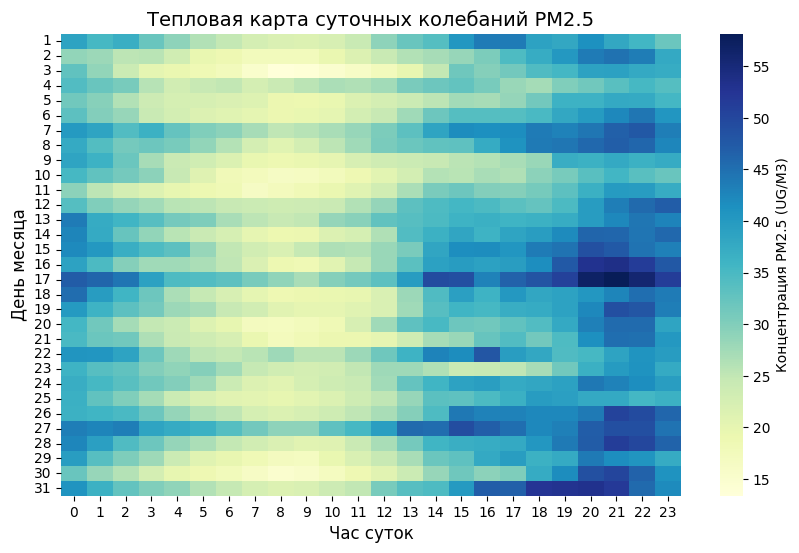

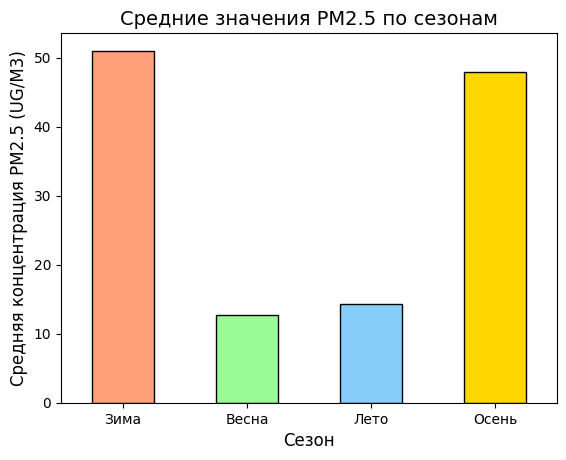

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data['Season'] = pd.cut(
    data['Month'], 
    bins=[0, 3, 6, 9, 12], 
    labels=['Зима', 'Весна', 'Лето', 'Осень'], 
    right=True
)

seasonal_trends = data.groupby('Season', observed=False)['NowCast Conc.'].mean()

heatmap_data = data.pivot_table(
    values='NowCast Conc.', 
    index='Day', 
    columns='Hour', 
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Концентрация PM2.5 (UG/M3)'})
plt.title("Тепловая карта суточных колебаний PM2.5", fontsize=14)
plt.xlabel("Час суток", fontsize=12)
plt.ylabel("День месяца", fontsize=12) 
plt.show()

seasonal_colors = ['#FFA07A', '#98FB98', '#87CEFA', '#FFD700']  
seasonal_trends.plot(kind='bar', color=seasonal_colors, edgecolor='black')
plt.title("Средние значения PM2.5 по сезонам", fontsize=14)
plt.xlabel("Сезон", fontsize=12)
plt.ylabel("Средняя концентрация PM2.5 (UG/M3)", fontsize=12)
plt.xticks(rotation=0)  
plt.show()

In [29]:
from scipy.stats import zscore

# Z-оценка
data['Z-Score'] = zscore(data['NowCast Conc.'])
z_outliers = data[abs(data['Z-Score']) > 3]

# Идентификация выбросов по IQR
iqr_outliers = data[(data['NowCast Conc.'] < lower_bound) | (data['NowCast Conc.'] > upper_bound)]

print("\nКоличество выбросов по Z-оценке:", z_outliers.shape[0])
print("\nКоличество выбросов по IQR:", iqr_outliers.shape[0])


Количество выбросов по Z-оценке: 1018

Количество выбросов по IQR: 4128


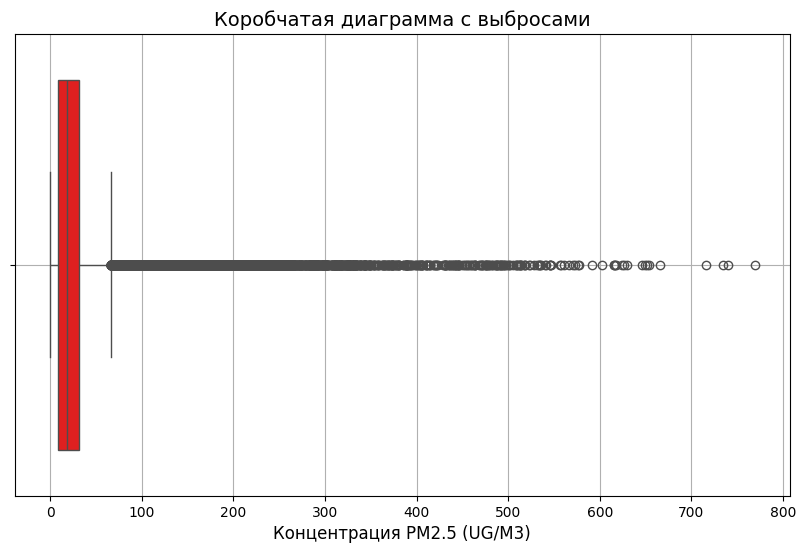

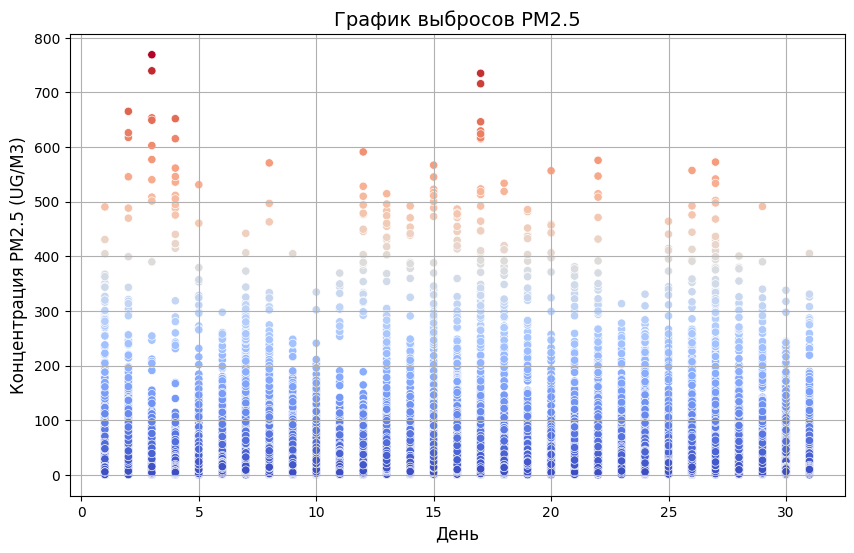

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['NowCast Conc.'], color='red')
plt.title("Коробчатая диаграмма с выбросами", fontsize=14)
plt.xlabel("Концентрация PM2.5 (UG/M3)", fontsize=12)
plt.grid(True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Day'], y=data['NowCast Conc.'], hue=data['Z-Score'], palette='coolwarm', legend=None)
plt.title("График выбросов PM2.5", fontsize=14)
plt.xlabel("День", fontsize=12)
plt.ylabel("Концентрация PM2.5 (UG/M3)", fontsize=12)
plt.grid(True)
plt.show()

In [31]:
data_without_outliers = data[abs(data['Z-Score']) <= 3]
print("\nРазмер данных без выбросов:", data_without_outliers.shape)

outlier_data = data[abs(data['Z-Score']) > 3]
print("\nРазмер данных с выбросами:", outlier_data.shape)



Размер данных без выбросов: (41837, 17)

Размер данных с выбросами: (1018, 17)
